# 수치입력 이진 분류 모델 레시피
수치를 입력해서 이진분류할 수 있는 모델들에 대하여 알아보겠다.<br>
이진 분류를 위한 데이터셋 생성을 해보고 가장 간단한 퍼셉트론 신경망 모델부터 깊은 다층퍼셉트론 신경망 모델까지 구성 및 학습해보겠다.

### 1. 데이터셋 준비
훈련에 사용할 임의의 값을 가진 인자 12개로 구성된 입력(x) 1000개와 각 입력에 대해 0과 1 중 임의로 지정된 출력(y)을 가지는 데이터셋을 생성한다.<br>
시험에 사용할 데이터는 100개 준비한다.

In [13]:
import numpy as np

#데이터셋 생성
x_train = np.random.random((1000, 12)) # 1000 x 12 행렬 생성
y_train = np.random.randint(2, size=(1000,1)) # 0과 1사이 난수 생성, size는 1000x1 행렬

x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100,1))

데이터셋의 12개 인자(x) 및 라벨값(y)은 모두 무작위 수이다.<br>
패턴이 없는 데이터이고 학습하기에 가장 어려운 케이스라 할 수 있다.<br>
패턴이 없기 때문에 이런 데이터로 학습한 모델은 시험셋에서 정확도가 상당히 낫다.<br>
하지만 이러한 무작위 데이터를 사용하는 이유는 다음과 같다.<br>

- 패턴이 없는 데이터에서 각 모델들이 얼마나 빨리 학습되는지 살펴볼 수 있다.

- 실제 데이터를 사용하기 전에 데이터셋 형태를 설계하거나 모델 프로토타입핑하기에 적절하다.

12개 입력 인자 중 첫 번째와 두 번째 인자 값만 이용하여 2차원으로 데이터 분포를 살펴보겠다.

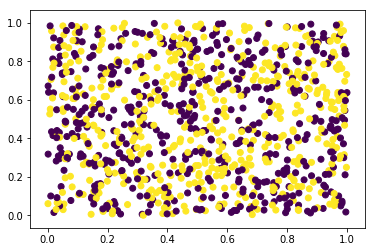

In [14]:
#데이터셋 확인(2차원)

%matplotlib inline
import matplotlib.pyplot as plt

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_color = y_train.reshape(1000,) # 2차원이므로 색깔이 2개로 구분해서 나온다.

plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

실제 데이터에서는 첫 번째 인자와 두 번째 인자 사이의 상관관계가 있다면 그래프에서 패턴을 볼 수 있다.<br>
우리는 임의의 값으로 데이터셋을 만들었으므로 예상대로 패턴을 찾을 수가 없다.<br>
아래 코드는 세 번째 인자를 추가하여 3차원 그래프를 확인해보겠다.<br>

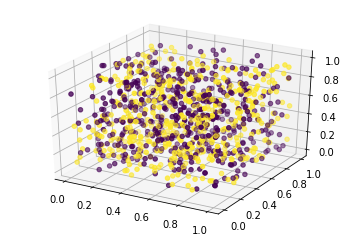

In [15]:
#데이터셋 확인(3차원)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # 111 = (1,1,1)

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_z = x_train[:,2]
plot_color = y_train.reshape(1000,)

ax.scatter(plot_x, plot_y, plot_z, c=plot_color)
plt.show()

역시나 패턴을 찾아볼 수 없다. 하지만 실제 데이터에서는 인자 간의 상관관계가 있을 경우 패턴을 확인할 수 있다.<br>
이와 같은 방식으로 모델을 설계하기 전에 데이터셋을 먼저 확인해보는 것을 권장한다.<br>
단 훈련 데이터셋을 **과적합**되는 것을 가정하고 있으므로 시험셋의 정확도는 무시해도 된다.<br>

### 2. 레이어 준비
- sigmoid : 활성화 함수로 입력되는 값을 0과 1 사이의 값으로 출력한다. 출력값이 특정 임계값 이상이면 양성 이하이면 음성이라 판별할 수 있기 때문에 이진분류 모델의 출력층에 주로 사용된다.

### 3. 모델 준비
이진 분류를 하기 위해 퍼셉트론 신경망 모델, 다층퍼셉트론 신경망 모델, 깊은 다층퍼셉트론 신경망 모델을 준비했다.<br>

- 퍼셉트론 신경망 모델
Dense 레이어가 하나이고 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 신경망 모델이다.<br>
weight(w) 하나, bias(b) 하나로 전형적인 **Y = w x X +b**를 풀기 위한 모델이다.<br>
이진 분류이므로 출력 레이어는 sigmoid 활성화 함수를 사용하였다.

    model = Sequential()
    model.add(Dense(1, input_dim=12, activation='sigmoid'))
    
또는 활성화 함수를 블록을 쌓듯이 별도 레이어로 구성해도 좋다. 어차피 동일한 모델이다.

    model = Sequential()
    model.add(Dense(1, input_dim=12))
    model.add(Activation('sigmoid'))
    
<br>

- 다층퍼셉트론 신경망 모델
Dense 레이어가 두 개인 다층퍼셉트론 신경망 모델이다.<br>
첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류 역전파가 용이한 relu 활성화 함수를 사용하였다.<br>
출력 레이어인 두 번쨰 레이어는 0과 1사이의 값 하나를 출력하기 위해 1개 뉴런과 sigmoid 활성화 함수를 사용하였다.<br>

    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
<br>
- 깊은 다층퍼셉트론 신경망 모델
Dense 레이어가 총 3개인 다층퍼셉트론 신경망 모델이다.<br>
첫 번째, 두 번째 레이어는 총 64개의 뉴런을 가진 Dense 레이어이고 오류 역전파가 용이한 relu 활성화 함수를 사용하였다.<br>
출력 레이어인 세 번째 레이어는 0과 1 사이의 값 하나를 출력하기 위해 뉴런과 sigmoid 활성화 함수를 사용하였다.

    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

### 4. 전체 소스

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1000





1000/1000 [==============================] - 0s 245us/step - loss: 0.7453 - acc: 0.4960
Epoch 2/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.7334 - acc: 0.5110
Epoch 3/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.7261 - acc: 0.5090
Epoch 4/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.7207 - acc: 0.5070
Epoch 5/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.7172 - acc: 0.5160
Epoch 6/1000
1000/1000 [==============================] - 0s 20us/step - loss: 0.7149 - acc: 0.5220
Epoch 7/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.7133 - acc: 0.5210
Epoch 8/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.7124 - acc: 0.5190
Epoch 9/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.7117 - acc:

1000/1000 [==============================] - 0s 12us/step - loss: 0.6986 - acc: 0.5140
Epoch 53/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6985 - acc: 0.5130
Epoch 54/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6982 - acc: 0.5140
Epoch 55/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6980 - acc: 0.5100
Epoch 56/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6978 - acc: 0.5120
Epoch 57/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6976 - acc: 0.5120
Epoch 58/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6974 - acc: 0.5180
Epoch 59/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.6971 - acc: 0.5090
Epoch 60/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6970 - acc: 0.5090
Epoch 61/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6968 - acc: 0.5090
Epoc

1000/1000 [==============================] - 0s 11us/step - loss: 0.6891 - acc: 0.5290
Epoch 133/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6891 - acc: 0.5330
Epoch 134/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6890 - acc: 0.5270
Epoch 135/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.6889 - acc: 0.5260
Epoch 136/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6889 - acc: 0.5260
Epoch 137/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6889 - acc: 0.5370
Epoch 138/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.6888 - acc: 0.5320
Epoch 139/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6888 - acc: 0.5400
Epoch 140/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6887 - acc: 0.5330
Epoch 141/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.6887 - acc: 0.

1000/1000 [==============================] - 0s 11us/step - loss: 0.6866 - acc: 0.5470
Epoch 213/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6866 - acc: 0.5490
Epoch 214/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6866 - acc: 0.5490
Epoch 215/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6866 - acc: 0.5500
Epoch 216/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6866 - acc: 0.5520
Epoch 217/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6865 - acc: 0.5480
Epoch 218/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6865 - acc: 0.5480
Epoch 219/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6865 - acc: 0.5480
Epoch 220/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6864 - acc: 0.5520
Epoch 221/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6865 - acc: 0.

1000/1000 [==============================] - 0s 14us/step - loss: 0.6859 - acc: 0.5370
Epoch 293/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6860 - acc: 0.5390
Epoch 294/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6859 - acc: 0.5390
Epoch 295/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6859 - acc: 0.5390
Epoch 296/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6859 - acc: 0.5370
Epoch 297/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6859 - acc: 0.5400
Epoch 298/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6860 - acc: 0.5380
Epoch 299/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6859 - acc: 0.5410
Epoch 300/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6859 - acc: 0.5410
Epoch 301/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6859 - acc: 0.

1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5360
Epoch 373/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5390
Epoch 374/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5330
Epoch 375/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5430
Epoch 376/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6858 - acc: 0.5320
Epoch 377/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6857 - acc: 0.5440
Epoch 378/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6858 - acc: 0.5360
Epoch 379/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5360
Epoch 380/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.6857 - acc: 0.5320
Epoch 381/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.

1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5300
Epoch 453/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5350
Epoch 454/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5390
Epoch 455/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5350
Epoch 456/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5340
Epoch 457/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6857 - acc: 0.5340
Epoch 458/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.6857 - acc: 0.5340
Epoch 459/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.5330
Epoch 460/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5350
Epoch 461/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.

1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5320
Epoch 533/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5370
Epoch 534/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5430
Epoch 535/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.5340
Epoch 536/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.5370
Epoch 537/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5320
Epoch 538/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5350
Epoch 539/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5350
Epoch 540/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.5360
Epoch 541/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.

1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.5330
Epoch 613/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5340
Epoch 614/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.6857 - acc: 0.5340
Epoch 615/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6858 - acc: 0.5380
Epoch 616/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6856 - acc: 0.5350
Epoch 617/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.6857 - acc: 0.5360
Epoch 618/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5330
Epoch 619/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5360
Epoch 620/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6858 - acc: 0.5310
Epoch 621/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6856 - acc: 0.

1000/1000 [==============================] - 0s 13us/step - loss: 0.6856 - acc: 0.5320
Epoch 693/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6859 - acc: 0.5320
Epoch 694/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5290
Epoch 695/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5310
Epoch 696/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6856 - acc: 0.5370
Epoch 697/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.6857 - acc: 0.5330
Epoch 698/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.5330
Epoch 699/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5350
Epoch 700/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6856 - acc: 0.5350
Epoch 701/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.

1000/1000 [==============================] - 0s 12us/step - loss: 0.6858 - acc: 0.5360
Epoch 773/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5340
Epoch 774/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5330
Epoch 775/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5400
Epoch 776/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5320
Epoch 777/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5350
Epoch 778/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6857 - acc: 0.5340
Epoch 779/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5330
Epoch 780/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6858 - acc: 0.5350
Epoch 781/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.

1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5340
Epoch 853/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5330
Epoch 854/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6857 - acc: 0.5340
Epoch 855/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6858 - acc: 0.5340
Epoch 856/1000
1000/1000 [==============================] - 0s 10us/step - loss: 0.6856 - acc: 0.5350
Epoch 857/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.5340
Epoch 858/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.5340
Epoch 859/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5330
Epoch 860/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.6856 - acc: 0.5320
Epoch 861/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6857 - acc: 0.

1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5360
Epoch 933/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6858 - acc: 0.5320
Epoch 934/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5280
Epoch 935/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5350
Epoch 936/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5350
Epoch 937/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6856 - acc: 0.5330
Epoch 938/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6858 - acc: 0.5340
Epoch 939/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6856 - acc: 0.5330
Epoch 940/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6857 - acc: 0.5350
Epoch 941/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6857 - acc: 0.

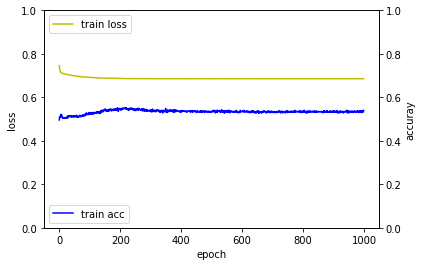

100/100 [==============================] - 0s 231us/step
loss_and_metrics : [0.7045801973342896, 0.48]


In [16]:
# 퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=12, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))


Epoch 1/1000
1000/1000 [==============================] - 0s 135us/step - loss: 0.6991 - acc: 0.4960
Epoch 2/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.6949 - acc: 0.5040
Epoch 3/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.6938 - acc: 0.5220
Epoch 4/1000
1000/1000 [==============================] - 0s 21us/step - loss: 0.6920 - acc: 0.5210
Epoch 5/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6908 - acc: 0.5260
Epoch 6/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.6904 - acc: 0.5360
Epoch 7/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6894 - acc: 0.5270
Epoch 8/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6884 - acc: 0.5480
Epoch 9/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.6876 - acc: 0.5460
Epoch 10/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.6869 - acc: 0.553

1000/1000 [==============================] - 0s 17us/step - loss: 0.6627 - acc: 0.6090
Epoch 83/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6624 - acc: 0.6230
Epoch 84/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6618 - acc: 0.6100
Epoch 85/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6620 - acc: 0.6310
Epoch 86/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.6607 - acc: 0.6300
Epoch 87/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6607 - acc: 0.6080
Epoch 88/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.6605 - acc: 0.6160
Epoch 89/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.6603 - acc: 0.6150
Epoch 90/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.6598 - acc: 0.6330
Epoch 91/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6594 - acc: 0.6170
Epoc

1000/1000 [==============================] - 0s 13us/step - loss: 0.6328 - acc: 0.6620
Epoch 163/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6341 - acc: 0.6590
Epoch 164/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6331 - acc: 0.6730
Epoch 165/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6332 - acc: 0.6640
Epoch 166/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6334 - acc: 0.6580
Epoch 167/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6317 - acc: 0.6740
Epoch 168/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6315 - acc: 0.6730
Epoch 169/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.6311 - acc: 0.6680
Epoch 170/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6318 - acc: 0.6670
Epoch 171/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6312 - acc: 0.

1000/1000 [==============================] - 0s 12us/step - loss: 0.6071 - acc: 0.6880
Epoch 243/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6061 - acc: 0.6910
Epoch 244/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6071 - acc: 0.6880
Epoch 245/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6053 - acc: 0.6800
Epoch 246/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6056 - acc: 0.6840
Epoch 247/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6051 - acc: 0.6980
Epoch 248/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6067 - acc: 0.6890
Epoch 249/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6048 - acc: 0.6830
Epoch 250/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.6036 - acc: 0.6950
Epoch 251/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.6053 - acc: 0.

1000/1000 [==============================] - 0s 11us/step - loss: 0.5857 - acc: 0.7040
Epoch 323/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5844 - acc: 0.7050
Epoch 324/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.5850 - acc: 0.7000
Epoch 325/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5839 - acc: 0.7070
Epoch 326/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.5850 - acc: 0.7080
Epoch 327/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5821 - acc: 0.7080
Epoch 328/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5832 - acc: 0.7180
Epoch 329/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.5831 - acc: 0.7020
Epoch 330/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5816 - acc: 0.7050
Epoch 331/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5830 - acc: 0.

1000/1000 [==============================] - 0s 16us/step - loss: 0.5658 - acc: 0.7200
Epoch 403/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5650 - acc: 0.7130
Epoch 404/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5638 - acc: 0.7180
Epoch 405/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5642 - acc: 0.7200
Epoch 406/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5627 - acc: 0.7320
Epoch 407/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5632 - acc: 0.7140
Epoch 408/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5627 - acc: 0.7210
Epoch 409/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.5635 - acc: 0.7260
Epoch 410/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5631 - acc: 0.7240
Epoch 411/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5630 - acc: 0.

1000/1000 [==============================] - 0s 12us/step - loss: 0.5456 - acc: 0.7420
Epoch 483/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5453 - acc: 0.7420
Epoch 484/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5443 - acc: 0.7400
Epoch 485/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5474 - acc: 0.7470
Epoch 486/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5438 - acc: 0.7360
Epoch 487/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5447 - acc: 0.7370
Epoch 488/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5450 - acc: 0.7370
Epoch 489/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5438 - acc: 0.7510
Epoch 490/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5443 - acc: 0.7430
Epoch 491/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5432 - acc: 0.

1000/1000 [==============================] - 0s 13us/step - loss: 0.5277 - acc: 0.7590
Epoch 563/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.5276 - acc: 0.7570
Epoch 564/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5267 - acc: 0.7650
Epoch 565/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5262 - acc: 0.7580
Epoch 566/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.5256 - acc: 0.7550
Epoch 567/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.5261 - acc: 0.7580
Epoch 568/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.5261 - acc: 0.7570
Epoch 569/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5273 - acc: 0.7550
Epoch 570/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5271 - acc: 0.7570
Epoch 571/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.5250 - acc: 0.

1000/1000 [==============================] - 0s 11us/step - loss: 0.5110 - acc: 0.7570
Epoch 643/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.5097 - acc: 0.7560
Epoch 644/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5102 - acc: 0.7720
Epoch 645/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.5099 - acc: 0.7650
Epoch 646/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.5097 - acc: 0.7710
Epoch 647/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5086 - acc: 0.7680
Epoch 648/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.5079 - acc: 0.7620
Epoch 649/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.5080 - acc: 0.7720
Epoch 650/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.5089 - acc: 0.7660
Epoch 651/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.5064 - acc: 0.

1000/1000 [==============================] - 0s 12us/step - loss: 0.4950 - acc: 0.7840
Epoch 723/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4930 - acc: 0.7740
Epoch 724/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4957 - acc: 0.7660
Epoch 725/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.4944 - acc: 0.7700
Epoch 726/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4920 - acc: 0.7770
Epoch 727/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.4931 - acc: 0.7790
Epoch 728/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.4947 - acc: 0.7750
Epoch 729/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4933 - acc: 0.7860
Epoch 730/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.4910 - acc: 0.7710
Epoch 731/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.4923 - acc: 0.

1000/1000 [==============================] - 0s 12us/step - loss: 0.4779 - acc: 0.7960
Epoch 803/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.4807 - acc: 0.7950
Epoch 804/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4776 - acc: 0.7980
Epoch 805/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4777 - acc: 0.7970
Epoch 806/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.4786 - acc: 0.7920
Epoch 807/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4802 - acc: 0.7860
Epoch 808/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.4805 - acc: 0.7850
Epoch 809/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.4766 - acc: 0.7980
Epoch 810/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4771 - acc: 0.7960
Epoch 811/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4761 - acc: 0.

1000/1000 [==============================] - 0s 12us/step - loss: 0.4648 - acc: 0.7890
Epoch 883/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4636 - acc: 0.7970
Epoch 884/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4608 - acc: 0.8020
Epoch 885/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.4667 - acc: 0.7900
Epoch 886/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4638 - acc: 0.8050
Epoch 887/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4639 - acc: 0.7960
Epoch 888/1000
1000/1000 [==============================] - 0s 11us/step - loss: 0.4634 - acc: 0.7930
Epoch 889/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4625 - acc: 0.7910
Epoch 890/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4630 - acc: 0.8040
Epoch 891/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.4635 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.4517 - acc: 0.8080
Epoch 963/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.4488 - acc: 0.7980
Epoch 964/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4520 - acc: 0.8000
Epoch 965/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4525 - acc: 0.7960
Epoch 966/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4500 - acc: 0.8030
Epoch 967/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.4524 - acc: 0.8080
Epoch 968/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4500 - acc: 0.8090
Epoch 969/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4498 - acc: 0.8080
Epoch 970/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4521 - acc: 0.8070
Epoch 971/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4518 - acc: 0.

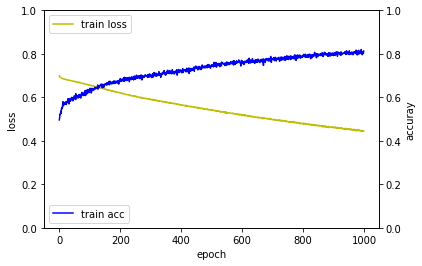

100/100 [==============================] - 0s 310us/step
loss_and_metrics : [0.8765229082107544, 0.53]


In [17]:
# 다층퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))


Epoch 1/1000
1000/1000 [==============================] - 0s 180us/step - loss: 0.6963 - acc: 0.4970
Epoch 2/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.6927 - acc: 0.5210
Epoch 3/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.6924 - acc: 0.5180
Epoch 4/1000
1000/1000 [==============================] - 0s 24us/step - loss: 0.6917 - acc: 0.5240
Epoch 5/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.6910 - acc: 0.5320
Epoch 6/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.6893 - acc: 0.5500
Epoch 7/1000
1000/1000 [==============================] - 0s 23us/step - loss: 0.6878 - acc: 0.5440
Epoch 8/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.6882 - acc: 0.5420
Epoch 9/1000
1000/1000 [==============================] - 0s 18us/step - loss: 0.6872 - acc: 0.5520
Epoch 10/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.6861 - acc: 0.564

1000/1000 [==============================] - 0s 14us/step - loss: 0.5795 - acc: 0.7170
Epoch 83/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5826 - acc: 0.7110
Epoch 84/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5776 - acc: 0.7160
Epoch 85/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5799 - acc: 0.7200
Epoch 86/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.5749 - acc: 0.7230
Epoch 87/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5724 - acc: 0.7200
Epoch 88/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.5728 - acc: 0.7170
Epoch 89/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.5714 - acc: 0.7190
Epoch 90/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.5668 - acc: 0.7230
Epoch 91/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.5681 - acc: 0.7040
Epoc

1000/1000 [==============================] - 0s 14us/step - loss: 0.4559 - acc: 0.8010
Epoch 163/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4597 - acc: 0.7920
Epoch 164/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.4553 - acc: 0.8100
Epoch 165/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4545 - acc: 0.8070
Epoch 166/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.4490 - acc: 0.8160
Epoch 167/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.4486 - acc: 0.8170
Epoch 168/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.4592 - acc: 0.7910
Epoch 169/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.4212 - acc: 0.765 - 0s 13us/step - loss: 0.4456 - acc: 0.8050
Epoch 170/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.4493 - acc: 0.8110
Epoch 171/1000
1000/1000 [==============================] -

1000/1000 [==============================] - 0s 17us/step - loss: 0.3553 - acc: 0.8620
Epoch 243/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.3635 - acc: 0.8640
Epoch 244/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.3478 - acc: 0.8770
Epoch 245/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.3472 - acc: 0.8750
Epoch 246/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.3535 - acc: 0.8520
Epoch 247/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.3582 - acc: 0.8630
Epoch 248/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.3463 - acc: 0.8680
Epoch 249/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.3445 - acc: 0.8880
Epoch 250/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.3503 - acc: 0.8530
Epoch 251/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.3450 - acc: 0.

1000/1000 [==============================] - 0s 14us/step - loss: 0.2721 - acc: 0.9130
Epoch 323/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.2713 - acc: 0.9090
Epoch 324/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.2673 - acc: 0.9120
Epoch 325/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.2595 - acc: 0.9200
Epoch 326/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.2739 - acc: 0.9090
Epoch 327/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.2620 - acc: 0.9200
Epoch 328/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.2597 - acc: 0.9270
Epoch 329/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.2629 - acc: 0.9070
Epoch 330/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.2668 - acc: 0.9050
Epoch 331/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.2583 - acc: 0.

1000/1000 [==============================] - 0s 15us/step - loss: 0.1840 - acc: 0.9590
Epoch 403/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.2006 - acc: 0.9420
Epoch 404/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1974 - acc: 0.9450
Epoch 405/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1875 - acc: 0.9610
Epoch 406/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1863 - acc: 0.9590
Epoch 407/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1931 - acc: 0.9550
Epoch 408/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1901 - acc: 0.9530
Epoch 409/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1953 - acc: 0.9500
Epoch 410/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.1942 - acc: 0.9470
Epoch 411/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.1797 - acc: 0.

1000/1000 [==============================] - 0s 13us/step - loss: 0.1325 - acc: 0.9710
Epoch 483/1000
1000/1000 [==============================] - 0s 19us/step - loss: 0.1375 - acc: 0.9720
Epoch 484/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1312 - acc: 0.9750
Epoch 485/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1452 - acc: 0.9630
Epoch 486/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.1377 - acc: 0.9760
Epoch 487/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1404 - acc: 0.9680
Epoch 488/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1301 - acc: 0.9770
Epoch 489/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1383 - acc: 0.9670
Epoch 490/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1352 - acc: 0.9740
Epoch 491/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.1307 - acc: 0.

1000/1000 [==============================] - 0s 13us/step - loss: 0.0894 - acc: 0.9860
Epoch 563/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0924 - acc: 0.9880
Epoch 564/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0878 - acc: 0.9930
Epoch 565/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0863 - acc: 0.9900
Epoch 566/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1083 - acc: 0.9800
Epoch 567/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0836 - acc: 0.9930
Epoch 568/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0936 - acc: 0.9920
Epoch 569/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.1000 - acc: 0.9830
Epoch 570/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0809 - acc: 0.9930
Epoch 571/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0904 - acc: 0.

1000/1000 [==============================] - 0s 13us/step - loss: 0.0739 - acc: 0.9890
Epoch 643/1000
1000/1000 [==============================] - 0s 17us/step - loss: 0.0558 - acc: 0.9990
Epoch 644/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0693 - acc: 0.9930
Epoch 645/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0656 - acc: 0.9930
Epoch 646/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0496 - acc: 1.0000
Epoch 647/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0736 - acc: 0.9910
Epoch 648/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0569 - acc: 0.9960
Epoch 649/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0589 - acc: 0.9970
Epoch 650/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0624 - acc: 0.9950
Epoch 651/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0656 - acc: 0.

1000/1000 [==============================] - 0s 14us/step - loss: 0.0332 - acc: 1.0000
Epoch 723/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0379 - acc: 1.0000
Epoch 724/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0442 - acc: 0.9960
Epoch 725/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0497 - acc: 0.9940
Epoch 726/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0330 - acc: 1.0000
Epoch 727/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0376 - acc: 1.0000
Epoch 728/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0484 - acc: 0.9920
Epoch 729/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0336 - acc: 1.0000
Epoch 730/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0511 - acc: 0.9940
Epoch 731/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0310 - acc: 1.

1000/1000 [==============================] - 0s 14us/step - loss: 0.0259 - acc: 0.9990
Epoch 803/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0222 - acc: 1.0000
Epoch 804/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0274 - acc: 1.0000
Epoch 805/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0257 - acc: 1.0000
Epoch 806/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0278 - acc: 0.9980
Epoch 807/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0291 - acc: 0.9980
Epoch 808/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0222 - acc: 0.9990
Epoch 809/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0317 - acc: 0.9960
Epoch 810/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0181 - acc: 1.0000
Epoch 811/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0378 - acc: 0.

1000/1000 [==============================] - 0s 14us/step - loss: 0.0113 - acc: 1.0000
Epoch 883/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0274 - acc: 0.9980
Epoch 884/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0113 - acc: 1.0000
Epoch 885/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0114 - acc: 1.0000
Epoch 886/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0324 - acc: 0.9910
Epoch 887/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0108 - acc: 1.0000
Epoch 888/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0115 - acc: 1.0000
Epoch 889/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0174 - acc: 1.0000
Epoch 890/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0114 - acc: 1.0000
Epoch 891/1000
1000/1000 [==============================] - 0s 19us/step - loss: 0.0287 - acc: 0.

1000/1000 [==============================] - 0s 13us/step - loss: 0.0069 - acc: 1.0000
Epoch 963/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0190 - acc: 0.9980
Epoch 964/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0071 - acc: 1.0000
Epoch 965/1000
1000/1000 [==============================] - 0s 14us/step - loss: 0.0267 - acc: 0.9950
Epoch 966/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0067 - acc: 1.0000
Epoch 967/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0066 - acc: 1.0000
Epoch 968/1000
1000/1000 [==============================] - 0s 16us/step - loss: 0.0212 - acc: 0.9990
Epoch 969/1000
1000/1000 [==============================] - 0s 15us/step - loss: 0.0069 - acc: 1.0000
Epoch 970/1000
1000/1000 [==============================] - 0s 13us/step - loss: 0.0086 - acc: 1.0000
Epoch 971/1000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0179 - acc: 0.

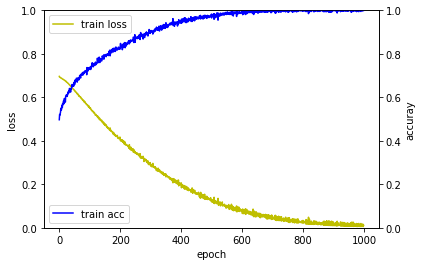

100/100 [==============================] - 0s 405us/step
loss_and_metrics : [3.3685021209716797, 0.48]


In [18]:
# 깊은 다층퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx() # 손실의 반대 = 정확도

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))


이것 역시 퍼셉트론 > 다층퍼셉트론 > 깊은 다층퍼셉트론 순으로 학습이 빨리 되는 것을 확인할 수 있다.